In [40]:
from tensorflow.keras.models   import Sequential
from tensorflow.keras.layers   import Conv2D, Dense, MaxPooling2D, Activation, Flatten,BatchNormalization,Dropout
from tensorflow.keras          import models, layers
import tensorflow.keras as keras

from tensorflow.keras          import backend as K
K.clear_session()

from tensorflow.keras.utils    import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt

from sklearn.metrics import confusion_matrix

import os

In [2]:
# train_datagen = ImageDataGenerator(rotation_range=30,
#     preprocessing_function=preprocess_input) 

train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.1)#,rotation_range=30) 

train_batches = train_datagen.flow_from_directory(directory='data',
                                                  target_size=(224,224), 
                                                  batch_size=32,
                                                  classes=['cats', 'panda'],
                                                  subset='training')

validation_batches = train_datagen.flow_from_directory(directory='data',
                                                       target_size=(224,224),
                                                       batch_size=32,
                                                       classes=['cats', 'panda'],
                                                       subset='validation')

Found 1800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [3]:
print(type(train_batches))
images,label = next(train_batches)

<class 'keras.preprocessing.image.DirectoryIterator'>


In [4]:
print(images,label)

[[[[0.2627451  0.26666668 0.24705884]
   [0.2627451  0.26666668 0.24705884]
   [0.27450982 0.2784314  0.25882354]
   ...
   [0.24313727 0.24313727 0.23529413]
   [0.2509804  0.25490198 0.23529413]
   [0.25490198 0.25882354 0.2392157 ]]

  [[0.26666668 0.27058825 0.2509804 ]
   [0.26666668 0.27058825 0.2509804 ]
   [0.28235295 0.28627452 0.26666668]
   ...
   [0.24705884 0.24705884 0.2392157 ]
   [0.26666668 0.27058825 0.2509804 ]
   [0.26666668 0.27058825 0.2509804 ]]

  [[0.27058825 0.27450982 0.25490198]
   [0.27058825 0.27450982 0.25490198]
   [0.28235295 0.28627452 0.26666668]
   ...
   [0.25490198 0.25490198 0.24705884]
   [0.26666668 0.27058825 0.2509804 ]
   [0.26666668 0.27058825 0.2509804 ]]

  ...

  [[0.58431375 0.5137255  0.45882356]
   [0.5803922  0.5529412  0.48235297]
   [0.59607846 0.5921569  0.5137255 ]
   ...
   [0.47450984 0.4784314  0.45882356]
   [0.47058827 0.4666667  0.45098042]
   [0.4431373  0.43921572 0.42352945]]

  [[0.3803922  0.30588236 0.24705884]
   [0.3

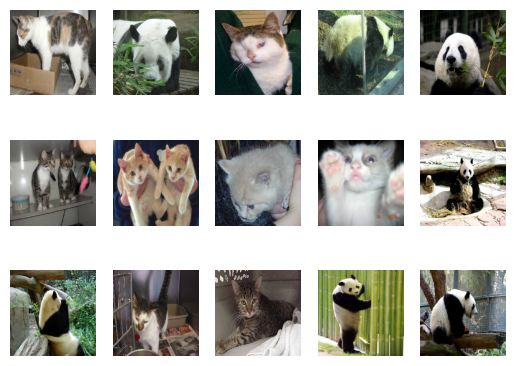

In [5]:
for i in range(15):
    #print(label[i])
    plt.subplot(3, 5, i+1)
    plt.imshow(images[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [6]:
images.shape

(32, 224, 224, 3)

In [7]:
model = Sequential([
    Conv2D(filters=6,kernel_size=(3,3),activation='relu',input_shape=images[0].shape),
    MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    
    BatchNormalization(),
    
    Conv2D(filters=16,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    
    BatchNormalization(),
    
    Flatten(),
    
    Dense(units=120,activation='relu'), # if you want to reacreate the LeNet 5 arch
    
    Dropout(0.2),
    
    Dense(units=84,activation='relu'),
    
    Dropout(0.2),
    
    Dense(units=2,activation='softmax')
])

2023-01-20 11:43:59.777182: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-20 11:43:59.777695: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-20 11:43:59.777717: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (elendar-Latitude-E7450): /proc/driver/nvidia/version does not exist
2023-01-20 11:43:59.778518: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 6)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 6)      24        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 16)       0         
 2D)                                                             
                                                        

In [9]:
from tensorflow.keras.optimizers import Adam

In [10]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
accuracy_metrics = model.fit(train_batches, verbose=2, validation_data=validation_batches, epochs=2)

Epoch 1/2
57/57 - 34s - loss: 8.7732 - accuracy: 0.7556 - val_loss: 15.7709 - val_accuracy: 0.5000 - 34s/epoch - 598ms/step
Epoch 2/2
57/57 - 32s - loss: 0.6721 - accuracy: 0.8367 - val_loss: 1.9405 - val_accuracy: 0.5000 - 32s/epoch - 570ms/step


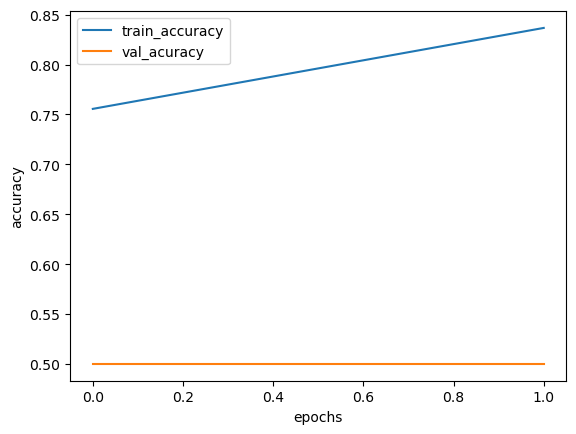

In [12]:
plt.plot(accuracy_metrics.history['accuracy'],label='train_accuracy')
plt.plot(accuracy_metrics.history['val_accuracy'],label='val_acuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
#plt.savefig()

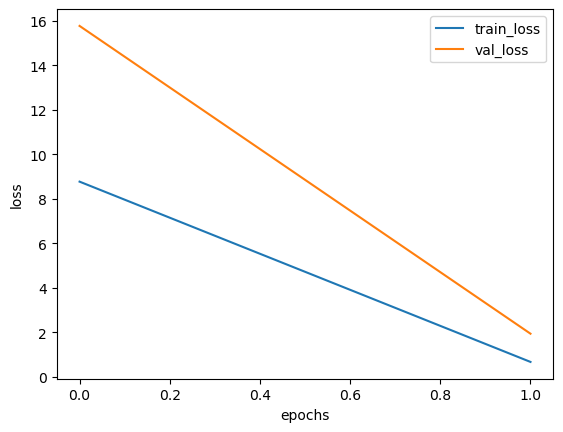

In [13]:
plt.plot(accuracy_metrics.history['loss'], label='train_loss')
plt.plot(accuracy_metrics.history['val_loss'], label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

### Make a prediction

In [14]:
the_pic = keras.preprocessing.image.load_img("data_animals/images/cat.jpg",
                                          target_size=(224,224))   

the_pic = keras.preprocessing.image.img_to_array(the_pic,dtype='uint8')
print(type(the_pic))
the_pic.shape

<class 'numpy.ndarray'>


(224, 224, 3)

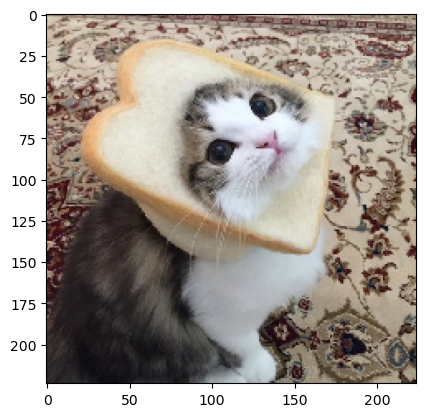

In [15]:
plt.imshow(the_pic)

In [16]:
the_pic = np.expand_dims(the_pic, axis=0)
the_pic.shape

(1, 224, 224, 3)

In [23]:
pred_me = model.predict(the_pic)

1/1 [==============================] - 0s 145ms/step


In [35]:
pred_me

array([[6.141810e-07, 9.999994e-01]], dtype=float32)

In [36]:
pred_me.argmax()

1

## Many images as test

In [37]:
test_base_path = './data_animals/images/'

In [44]:
files=[]
for file in os.listdir(test_base_path):
    files.append(file)
files

['panda.jpg', 'dog.jpg', 'cat.jpg']

1/1 [==============================] - 0s 46ms/step
[[1.3665448e-13 1.0000000e+00]]
1/1 [==============================] - 0s 28ms/step
[[2.3260142e-04 9.9976736e-01]]
1/1 [==============================] - 0s 30ms/step
[[6.141810e-07 9.999994e-01]]


'./data_animals/images/cat.jpg'

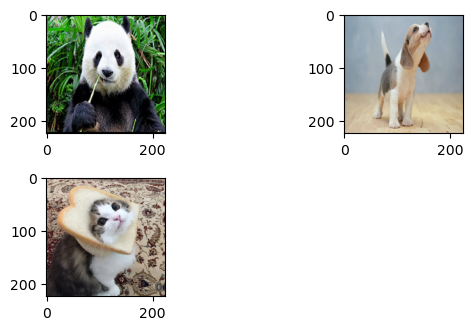

In [74]:
def batch_prediction_custom_model(files=files):
    for i in range(len(files)):
        '''read&process'''
        my_path = f'{test_base_path}{files[i]}'
        pic = keras.preprocessing.image.load_img(my_path, target_size=(224,224))
        numpy_image = np.array(pic)
        image_batch = np.expand_dims(numpy_image, axis=0)
        processed_image = image_batch #preprocess_input(image_batch)
        
        '''predict'''
        predictions=model.predict(processed_image)
        label = predictions#decode_predictions(predictions)
        print(label)
        
        '''plot'''
        plt.subplot(3,2,i+1);
        plt.tight_layout()
        plt.imshow(pic)
        #plt.title(f'cats: {label[0]}, dogs: {label[1]}')
        #plt.title(f'''{label[0][0][1]}''')
    return my_path
        
batch_prediction_custom_model()

In [75]:
label.shape

(32, 2)

In [76]:
label[2]

array([1., 0.], dtype=float32)

In [80]:
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input,decode_predictions
ready_base_path = './images/'

def batch_prediction_ready_model(files=files):
    for i in range(len(files)):
        '''read&process'''
        my_path = f'{ready_base_path}{files[i]}'
        pic = keras.preprocessing.image.load_img(my_path, target_size=(224,224))
        numpy_image = np.array(pic)
        image_batch = np.expand_dims(numpy_image, axis=0)
        processed_image = preprocess_input(image_batch)
        
        '''predict'''
        predictions=model.predict(processed_image)
        label = decode_predictions(predictions)
        
        
        '''plot'''
        plt.subplot(3,2,i+1);
        plt.tight_layout()
        plt.imshow(pic)
        #plt.title(f'cats: {label[0]}, dogs: {label[1]}')
        #plt.title(f'''{label[0][0][1]}''')
        
batch_prediction_ready_model()

FileNotFoundError: [Errno 2] No such file or directory: './images/panda.jpg'